In [15]:
import pandas as pd
import joblib

test_df = pd.read_csv("../../tests/data/user/full_features.csv")

model = joblib.load("../../models/gb_model_selected_features_transform.pkl")

test_df.head()

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,mag_uc_4_8km,radio_k_pct,radio_u_ppm,gravity_cscba_stddev3x3,mag_uc_2_4km_thd,mag_uc_2_4km_stddev3x3,radio_th_k_ratio
0,-2.347901e+06,7.890331e+05,313.891357,-1711.845459,48.904354,-110.120186,2.089952,1.650577,222.903000,0.010406,0.269729,6.418465
1,-1.327772e+06,1.159960e+06,342.139557,NaN,313.095428,-5.648541,0.110827,1.865251,NaN,NaN,NaN,40.705643
2,-2.825754e+06,1.270949e+06,-221.139679,-708.793701,-477.473206,3.603062,0.134448,1.176058,6.812213,0.007102,0.181195,46.490425
3,-3.175708e+06,1.440866e+06,-99.279518,-759.444763,-237.948151,-2.129511,0.820230,1.127624,13.290034,0.002433,0.062576,10.648052
4,-2.553178e+06,1.751907e+06,424.947296,143.522614,292.836273,20.866171,1.099405,2.181279,23.438042,0.030678,0.785317,11.946527


In [16]:
import numpy as np
log1p_cols = [
    'gravity_cscba_stddev3x3',
    'mag_uc_2_4km_thd',
    'mag_uc_2_4km_stddev3x3',
    'radio_th_k_ratio',
]

for col in log1p_cols:
    test_df[col] = pd.to_numeric(test_df[col], errors="coerce")
    test_df[f"{col}_log1p"] = np.log1p(test_df[col].clip(lower=0).fillna(0))


In [17]:
test_df.drop(columns=log1p_cols, inplace=True)

In [18]:
test_df.head()

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,mag_uc_4_8km,radio_k_pct,radio_u_ppm,gravity_cscba_stddev3x3_log1p,mag_uc_2_4km_thd_log1p,mag_uc_2_4km_stddev3x3_log1p,radio_th_k_ratio_log1p
0,-2.347901e+06,7.890331e+05,313.891357,-1711.845459,48.904354,-110.120186,2.089952,1.650577,5.411213,0.010352,0.238804,2.003972
1,-1.327772e+06,1.159960e+06,342.139557,NaN,313.095428,-5.648541,0.110827,1.865251,0.000000,0.000000,0.000000,3.730636
2,-2.825754e+06,1.270949e+06,-221.139679,-708.793701,-477.473206,3.603062,0.134448,1.176058,2.055688,0.007077,0.166527,3.860528
3,-3.175708e+06,1.440866e+06,-99.279518,-759.444763,-237.948151,-2.129511,0.820230,1.127624,2.659562,0.002430,0.060696,2.455139
4,-2.553178e+06,1.751907e+06,424.947296,143.522614,292.836273,20.866171,1.099405,2.181279,3.196141,0.030217,0.579596,2.560828


In [19]:
X = test_df.drop(columns=["latitude", "longitude"])

In [20]:
X.head()

,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,mag_uc_4_8km,radio_k_pct,radio_u_ppm,gravity_cscba_stddev3x3_log1p,mag_uc_2_4km_thd_log1p,mag_uc_2_4km_stddev3x3_log1p,radio_th_k_ratio_log1p
0,313.891357,-1711.845459,48.904354,-110.120186,2.089952,1.650577,5.411213,0.010352,0.238804,2.003972
1,342.139557,NaN,313.095428,-5.648541,0.110827,1.865251,0.000000,0.000000,0.000000,3.730636
2,-221.139679,-708.793701,-477.473206,3.603062,0.134448,1.176058,2.055688,0.007077,0.166527,3.860528
3,-99.279518,-759.444763,-237.948151,-2.129511,0.820230,1.127624,2.659562,0.002430,0.060696,2.455139
4,424.947296,143.522614,292.836273,20.866171,1.099405,2.181279,3.196141,0.030217,0.579596,2.560828


In [22]:
for col in X.columns:
    X[col] = X[col].transform(lambda x: x.fillna(x.median()))

In [23]:
test_df["prediction"] = model.predict_proba(X)[:, 1]
test_df.to_csv("../../data/test/test_full_features_qld_with_prediction.csv", index=False)

In [36]:
top_n = 100
top_df = test_df.sort_values(by="prediction", ascending=False).head(top_n).copy()
top_df

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,mag_uc_4_8km,radio_k_pct,radio_u_ppm,gravity_cscba_stddev3x3_log1p,mag_uc_2_4km_thd_log1p,mag_uc_2_4km_stddev3x3_log1p,radio_th_k_ratio_log1p,prediction
7399,-3.240650e+06,1.600623e+06,0.531456,-592.781494,-145.674271,-0.297801,0.732565,0.907123,4.095077,0.039464,0.706821,2.455866,0.999926
10964,-3.193690e+06,1.746665e+06,0.353489,-827.958862,-211.974197,-0.043123,0.501222,1.010244,2.794731,0.036346,0.665279,2.702656,0.999644
1702,-3.026811e+06,1.080581e+06,0.369050,-154.664627,-128.290649,-0.784409,0.409229,1.258386,3.627075,0.007113,0.167493,3.308464,0.999305
1122,-2.575166e+06,1.439230e+06,256.380310,-360.613800,-47.699375,-0.448185,0.181932,1.212531,3.829893,0.036203,0.663433,3.744283,0.995237
8832,-2.698270e+06,1.407825e+06,23.157877,-1306.300049,-330.518677,-0.760669,NaN,NaN,2.602690,0.006536,0.154995,0.000000,0.994996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15446,-3.154594e+06,1.124880e+06,64.896355,447.957031,-58.620113,-0.354175,0.385731,1.020836,2.963325,0.017879,0.378656,2.839596,0.833715
4162,-2.616430e+06,1.710657e+06,110.231628,-925.569702,-47.217583,-0.752735,0.877871,1.224862,2.468041,0.013898,0.305234,2.237698,0.832741
18451,-2.691391e+06,1.307997e+06,83.794044,898.672974,-151.685806,-0.575545,0.945305,0.697907,3.136728,0.016465,0.353299,2.056392,0.826046
26074,-3.215760e+06,1.411306e+06,75.319862,1214.820557,-45.126705,-0.404347,0.638961,1.043138,4.772812,0.012760,0.289294,2.520871,0.800773


In [37]:
import geopandas as gpd
from shapely.geometry import Point


geometry_all = [Point(xy) for xy in zip(test_df["longitude"], test_df["latitude"])]
gdf_all = gpd.GeoDataFrame(test_df, geometry=geometry_all, crs="EPSG:3577")


geometry_top = [Point(xy) for xy in zip(top_df["longitude"], top_df["latitude"])]
gdf_top = gpd.GeoDataFrame(top_df, geometry=geometry_top, crs="EPSG:3577")


In [38]:
gdf_top.head()

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,mag_uc_4_8km,radio_k_pct,radio_u_ppm,gravity_cscba_stddev3x3_log1p,mag_uc_2_4km_thd_log1p,mag_uc_2_4km_stddev3x3_log1p,radio_th_k_ratio_log1p,prediction,geometry
7399,-3.240650e+06,1.600623e+06,0.531456,-592.781494,-145.674271,-0.297801,0.732565,0.907123,4.095077,0.039464,0.706821,2.455866,0.999926,POINT (1600622.722 -3240650.274)
10964,-3.193690e+06,1.746665e+06,0.353489,-827.958862,-211.974197,-0.043123,0.501222,1.010244,2.794731,0.036346,0.665279,2.702656,0.999644,POINT (1746664.669 -3193690.302)
1702,-3.026811e+06,1.080581e+06,0.369050,-154.664627,-128.290649,-0.784409,0.409229,1.258386,3.627075,0.007113,0.167493,3.308464,0.999305,POINT (1080581.073 -3026810.71)
1122,-2.575166e+06,1.439230e+06,256.380310,-360.613800,-47.699375,-0.448185,0.181932,1.212531,3.829893,0.036203,0.663433,3.744283,0.995237,POINT (1439229.65 -2575166.311)
8832,-2.698270e+06,1.407825e+06,23.157877,-1306.300049,-330.518677,-0.760669,NaN,NaN,2.602690,0.006536,0.154995,0.000000,0.994996,POINT (1407824.813 -2698269.783)


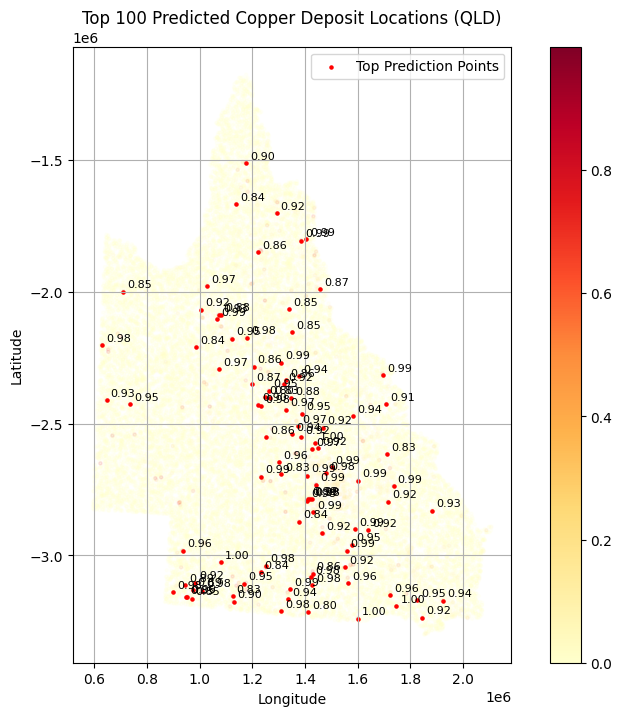

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))


gdf_all.plot(column="prediction", cmap="YlOrRd", legend=True, markersize=5, ax=ax, alpha=0.1)

gdf_top.plot(color="red", markersize=5, ax=ax, label="Top Prediction Points")


for idx, row in gdf_top.iterrows():
    ax.annotate(f"{row['prediction']:.2f}", xy=(row.geometry.x, row.geometry.y), xytext=(3, 3),
                textcoords="offset points", fontsize=8, color="black")

plt.title(f"Top {top_n} Predicted Copper Deposit Locations (QLD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()


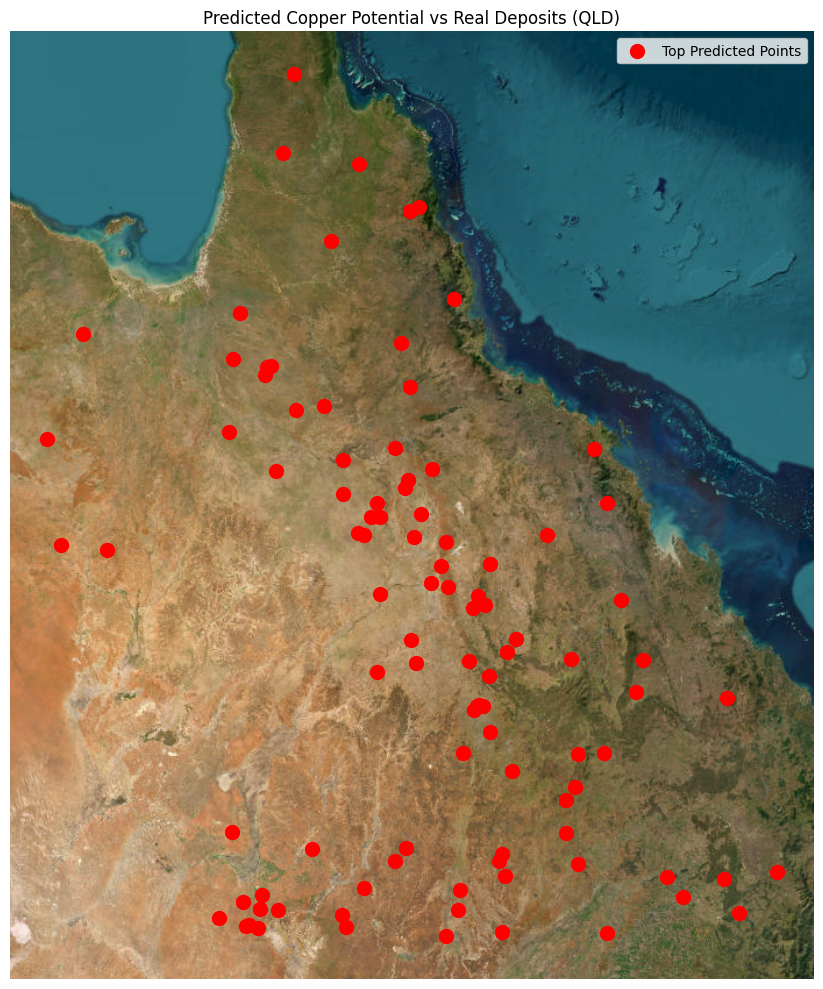

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

gdf_top_web = gdf_top.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))

gdf_top_web.plot(ax=ax, color="red", markersize=100, label="Top Predicted Points")

ctx.add_basemap(
    ax,
    source=ctx.providers.Esri.WorldImagery,  
    zoom=6,
    attribution=False
)


plt.title("Predicted Copper Potential vs Real Deposits (QLD)")
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()
